In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

%config InlineBackend.figure_format = 'svg'
%matplotlib inline 

In [3]:
# read the data
atmospheric_co2 = pd.read_csv('/Users/yagmurbali/DS/project1/athmospheric_co2.csv')
fossil_fuel_emission = pd.read_csv('/Users/yagmurbali/DS/project1/fossil-fuel-co2-emissions-by-nation_csv.csv')

In [4]:
# viewed the data types, and counted the null values
atmospheric_co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 727 entries, 0 to 726
Data columns (total 6 columns):
Date              727 non-null object
Decimal Date      727 non-null float64
Average           727 non-null float64
Interpolated      727 non-null float64
Trend             727 non-null float64
Number of Days    727 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 34.2+ KB


In [5]:
# checked the null values in the dataset. We can see that there are no nulls
atmospheric_co2.isnull()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
722,False,False,False,False,False,False
723,False,False,False,False,False,False
724,False,False,False,False,False,False
725,False,False,False,False,False,False


In [6]:
# viewed the first few rows in the data
atmospheric_co2.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1


In [7]:
# viewed the last few rows in the data
atmospheric_co2.tail()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
722,2018-05-01,2018.375,411.24,411.24,407.91,24
723,2018-06-01,2018.458,410.79,410.79,408.49,29
724,2018-07-01,2018.542,408.71,408.71,408.32,27
725,2018-08-01,2018.625,406.99,406.99,408.90,30
726,2018-09-01,2018.708,405.51,405.51,409.02,29


In [8]:
# grouped date by Interpolated and Trend. 
# Trend values represent the monthly mean values, centered on the middle of each month.
# Interpolated values represent the same as Trend values, after correction for the average seasonal cycle. 
grouped_co2 = atmospheric_co2.groupby(['Interpolated', 'Trend']).mean()
grouped_co2

,,Decimal Date,Average,Number of Days
Interpolated,Trend,,,
312.66,315.61,1958.792,-99.99,-1
313.20,315.91,1958.708,313.20,-1
313.26,316.19,1959.792,313.26,-1
313.33,315.31,1958.875,313.33,-1
313.83,316.76,1960.792,313.83,-1
...,...,...,...,...
409.41,407.92,2018.208,409.41,30
409.69,406.36,2017.375,409.69,27
410.24,407.45,2018.292,410.24,21


In [9]:
# viewed the dtype of the values in Date column
print(atmospheric_co2['Date'].dtype)

object


In [10]:
# changed the dtype from object to datetime64
atmospheric_co2['Date'] = pd.to_datetime(atmospheric_co2['Date'])

print(atmospheric_co2['Date'].dtype)

datetime64[ns]


In [11]:
# extracted year,month and day to new column
atmospheric_co2['Year'] = atmospheric_co2['Date'].dt.year

atmospheric_co2['Month'] = atmospheric_co2['Date'].dt.month

atmospheric_co2['Day'] = atmospheric_co2['Date'].dt.day

atmospheric_co2.head()

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,Year,Month,Day
0,1958-03-01,1958.208,315.71,315.71,314.62,-1,1958,3,1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1,1958,4,1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1,1958,5,1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1,1958,6,1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1,1958,7,1


In [12]:
# reorganized the date for the years greater than 1999
co2_gt_2000 = atmospheric_co2[atmospheric_co2['Year'] > 1999]
co2_gt_2000

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,Year,Month,Day
502,2000-01-01,2000.042,369.29,369.29,369.08,26,2000,1,1
503,2000-02-01,2000.125,369.54,369.54,368.83,19,2000,2,1
504,2000-03-01,2000.208,370.60,370.60,369.09,30,2000,3,1
505,2000-04-01,2000.292,371.81,371.81,369.28,27,2000,4,1
506,2000-05-01,2000.375,371.58,371.58,368.71,28,2000,5,1
...,...,...,...,...,...,...,...,...,...
722,2018-05-01,2018.375,411.24,411.24,407.91,24,2018,5,1
723,2018-06-01,2018.458,410.79,410.79,408.49,29,2018,6,1
724,2018-07-01,2018.542,408.71,408.71,408.32,27,2018,7,1
725,2018-08-01,2018.625,406.99,406.99,408.90,30,2018,8,1


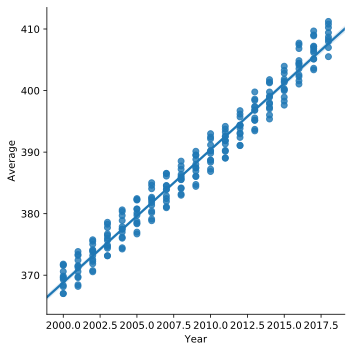

In [14]:
# monthly mean carbon dioxide measured at Mauna Loa Observatory, Hawaii.
sns.lmplot(x='Year', y='Average', data=co2_gt_2000)

In [16]:
 # CO2 emissions from fossil fuels by nation. As we could see, there are no nulls
fossil_fuel_emission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17232 entries, 0 to 17231
Data columns (total 10 columns):
Year                           17232 non-null int64
Country                        17232 non-null object
Total                          17232 non-null int64
Solid Fuel                     17232 non-null int64
Liquid Fuel                    17232 non-null int64
Gas Fuel                       17232 non-null int64
Cement                         17232 non-null int64
Gas Flaring                    17232 non-null int64
Per Capita                     17232 non-null float64
Bunker fuels (Not in Total)    17232 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.3+ MB


In [17]:
fossil_fuel_emission.isnull()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
17227,False,False,False,False,False,False,False,False,False,False
17228,False,False,False,False,False,False,False,False,False,False
17229,False,False,False,False,False,False,False,False,False,False
17230,False,False,False,False,False,False,False,False,False,False


In [18]:
# viewed the first few rows in the data
fossil_fuel_emission.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.0,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.0,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.0,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.0,0


In [19]:
# viewed the last few rows in the data
fossil_fuel_emission.tail()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
17227,2014,VIET NAM,45517,19246,12694,5349,8229,0,0.49,761
17228,2014,WALLIS AND FUTUNA ISLANDS,6,0,6,0,0,0,0.44,1
17229,2014,YEMEN,6190,137,5090,581,381,0,0.24,153
17230,2014,ZAMBIA,1228,132,797,0,299,0,0.08,33
17231,2014,ZIMBABWE,3278,2097,1005,0,177,0,0.22,9


In [20]:
# viewed the name of the countries in data 
fossil_fuel_emission.Country.unique()

array(['UNITED KINGDOM', 'CANADA', 'GERMANY', 'POLAND',
       'UNITED STATES OF AMERICA', 'BELGIUM', 'FRANCE (INCLUDING MONACO)',
       'AUSTRIA', 'NORWAY', 'HUNGARY', 'SPAIN', 'USSR', 'SWEDEN',
       'DENMARK', 'NETHERLANDS', 'IRELAND', 'AUSTRALIA', 'ROMANIA',
       'INDIA', 'SWITZERLAND', 'CZECHOSLOVAKIA', 'FINLAND',
       'ITALY (INCLUDING SAN MARINO)', 'TURKEY', 'GREECE',
       'JAPAN (EXCLUDING THE RUYUKU ISLANDS)', 'PORTUGAL', 'NEW ZEALAND',
       'BULGARIA', 'YUGOSLAVIA (FORMER SOCIALIST FEDERAL REPUBLIC)',
       'PERU', 'SOUTH AFRICA', 'ARGENTINA', 'INDONESIA',
       'PENINSULAR MALAYSIA', 'MEXICO', 'VIET NAM', 'CHILE', 'TAIWAN',
       'CHINA (MAINLAND)', 'ALGERIA', 'BRAZIL',
       'ISLAMIC REPUBLIC OF IRAN', 'ZIMBABWE', 'VENEZUELA',
       'UNITED KOREA', 'PHILIPPINES', 'TRINIDAD AND TOBAGO', 'EGYPT',
       'NIGERIA', 'TUNISIA', 'ECUADOR',
       'DEMOCRATIC REPUBLIC OF THE CONGO (FORMERLY ZAIRE)', 'PUERTO RICO',
       'COLOMBIA', 'IRAQ', 'SARAWAK', 'NETHERLAND AN

In [21]:
# showed the change of fossil fuel emission in years for selected developed countries
developed_countries = fossil_fuel_emission[fossil_fuel_emission['Country'].isin(['UNITED KINGDOM',
                                                                                 'UNITED STATES OF AMERICA',
                                                                                'CANADA'])]   
developed_countries

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.00,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.00,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.00,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.00,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
17000,2013,UNITED KINGDOM,124966,38543,43698,41024,1116,586,1.95,11111
17002,2013,UNITED STATES OF AMERICA,1406916,450641,562260,379659,10528,3828,4.38,31592
17045,2014,CANADA,146494,20667,67717,55436,1616,1059,4.12,914
17220,2014,UNITED KINGDOM,114486,31081,44274,37340,1218,573,1.78,10921


In [26]:
# reorganized the date for the years greater than 1995
developed_1995 = developed_countries[developed_countries['Year'] > 1995]
developed_1995.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
13153,1996,CANADA,130739,27406,56535,43994,1576,1228,4.42,1642
13322,1996,UNITED KINGDOM,150378,45003,54929,47444,1661,1340,2.58,8748
13324,1996,UNITED STATES OF AMERICA,1432264,520930,582071,314272,10991,4000,5.24,36585
13367,1997,CANADA,135068,29139,58680,44323,1634,1292,4.52,1609
13536,1997,UNITED KINGDOM,143808,40673,52677,47605,1719,1134,2.46,9291


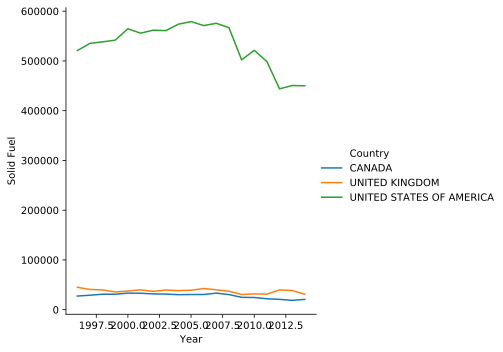

In [28]:
# drew the change of solid fuel emission in years for selected developed countries
sns.relplot(x='Year', y='Solid Fuel', hue='Country', kind='line', data=developed_1995);

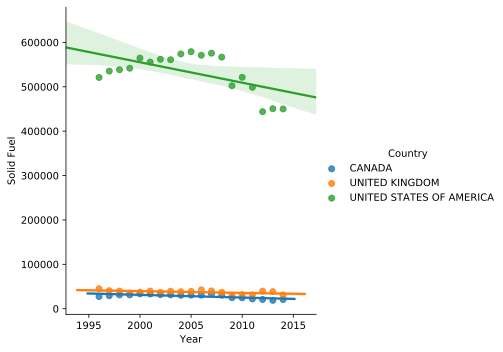

In [29]:
# drew the change of solid fuel emission in years for selected developed countries
sns.lmplot(x='Year', y='Solid Fuel', hue='Country', data=developed_1995)

In [30]:
# showed the change of fossil fuel emission in years just for the UK and Canada
developed_UK_CA = fossil_fuel_emission[fossil_fuel_emission['Country'].isin(['UNITED KINGDOM',
                                                                                'CANADA'])]   
developed_UK_CA

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
0,1751,UNITED KINGDOM,2552,2552,0,0,0,0,0.00,0
1,1752,UNITED KINGDOM,2553,2553,0,0,0,0,0.00,0
2,1753,UNITED KINGDOM,2553,2553,0,0,0,0,0.00,0
3,1754,UNITED KINGDOM,2554,2554,0,0,0,0,0.00,0
4,1755,UNITED KINGDOM,2555,2555,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
16780,2012,UNITED KINGDOM,127781,39717,44872,41549,1081,563,2.01,11295
16825,2013,CANADA,141031,18778,65850,53841,1579,983,4.00,1048
17000,2013,UNITED KINGDOM,124966,38543,43698,41024,1116,586,1.95,11111
17045,2014,CANADA,146494,20667,67717,55436,1616,1059,4.12,914


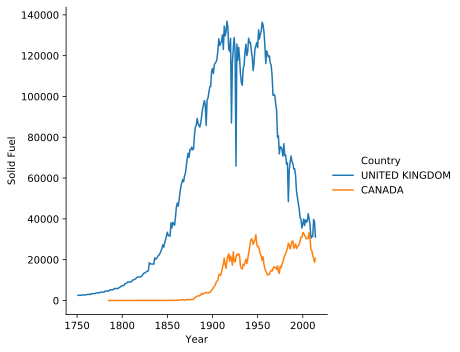

In [31]:
# drew the change of solid fuel emission in years for the UK and Canada
sns.relplot(x='Year', y='Solid Fuel', hue='Country', kind='line', data=developed_UK_CA);

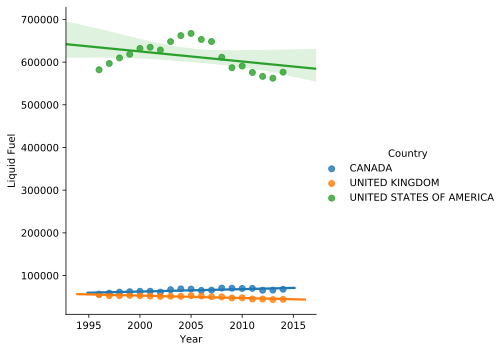

In [33]:
# drew the change of liquid fuel emission in years for selected developed countries since 1995
sns.lmplot(x='Year', y='Liquid Fuel', hue='Country', data=developed_1995)

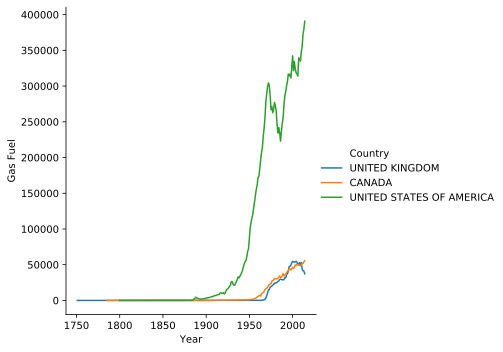

In [34]:
# drew the change of gas fuel emission in years for selected developed countries
sns.relplot(x='Year', y='Gas Fuel', hue='Country', kind='line', data=developed_countries);

In [35]:
# showed the change of fossil fuel emission in years for selected developing countries
developing_countries = fossil_fuel_emission[fossil_fuel_emission['Country'].isin(['TURKEY', 'MEXICO', 'BRAZIL'])]   
developing_countries

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
792,1865,TURKEY,41,41,0,0,0,0,0.00,0
815,1866,TURKEY,57,57,0,0,0,0,0.00,0
838,1867,TURKEY,62,62,0,0,0,0,0.00,0
862,1868,TURKEY,48,48,0,0,0,0,0.00,0
886,1869,TURKEY,73,73,0,0,0,0,0.00,0
...,...,...,...,...,...,...,...,...,...,...
16919,2013,MEXICO,133717,13640,75790,38831,4707,749,1.08,3124
16993,2013,TURKEY,88566,34281,21125,23456,9702,1,1.16,1908
17038,2014,BRAZIL,144480,20089,92454,21297,9691,949,0.70,4895
17139,2014,MEXICO,130971,13358,73374,37801,4760,1678,1.04,3300


In [36]:
# reorganized the date for the years greater than 1995
developing_1995 = developing_countries[developing_countries['Year'] > 1995]
developing_1995.head()

,Year,Country,Total,Solid Fuel,Liquid Fuel,Gas Fuel,Cement,Gas Flaring,Per Capita,Bunker fuels (Not in Total)
13146,1996,BRAZIL,77661,12788,56373,2899,4705,896,0.47,1801
13245,1996,MEXICO,94469,6877,64641,17125,3450,2377,1.01,2497
13315,1996,TURKEY,51324,20025,22114,4364,4789,32,0.86,379
13360,1997,BRAZIL,81960,13002,59631,3218,5181,929,0.49,2181
13459,1997,MEXICO,100837,6980,68833,17951,3747,3327,1.06,2616


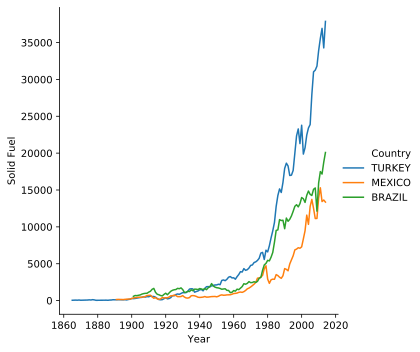

In [37]:
# drew the change of solid fuel emission in years for selected developing countries
sns.relplot(x='Year', y='Solid Fuel', hue='Country', kind='line', data=developing_countries);

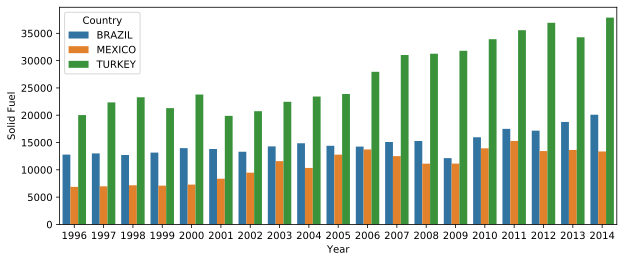

In [39]:
# drew the change of solid fuel emission in years for selected developing countries since 1995
plt.figure(figsize=(10,4))
sns.barplot(x="Year", y="Solid Fuel", hue='Country', data=developing_1995)

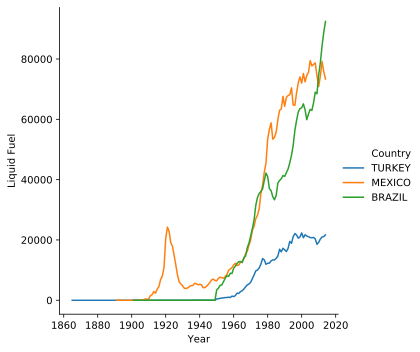

In [40]:
# drew the change of liquid fuel emission in years for selected developing countries
sns.relplot(x='Year', y='Liquid Fuel', hue='Country', kind='line', data=developing_countries);

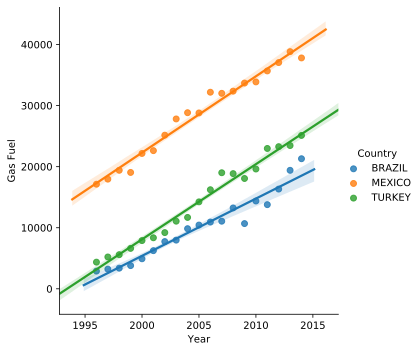

In [41]:
sns.lmplot(x='Year', y='Gas Fuel', hue='Country', data=developing_1995)